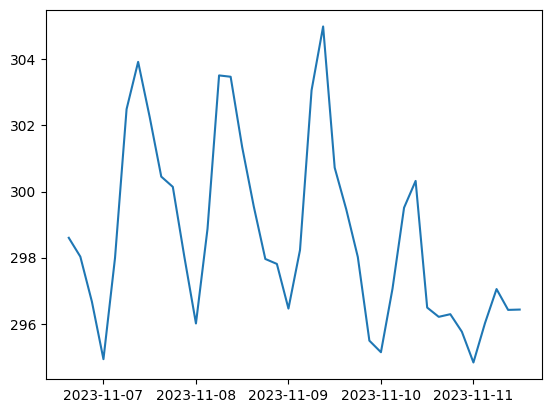

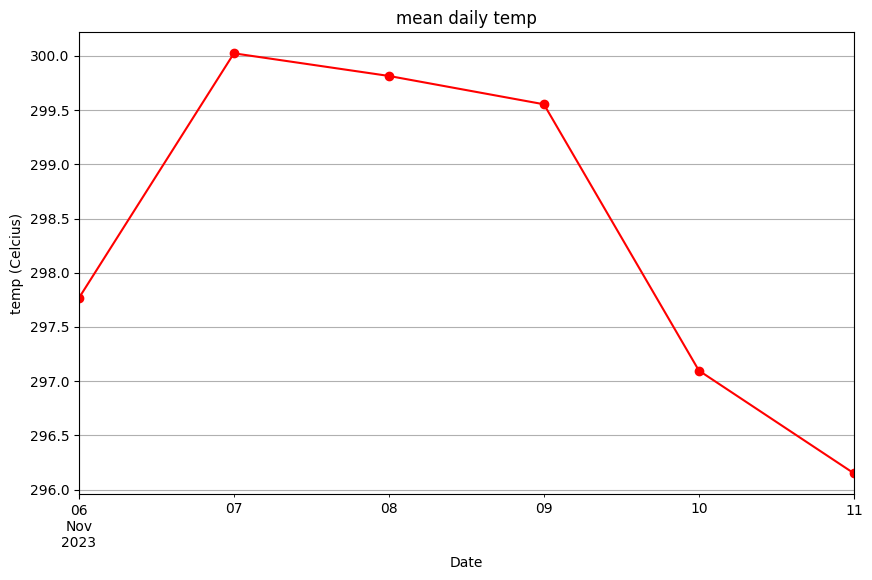

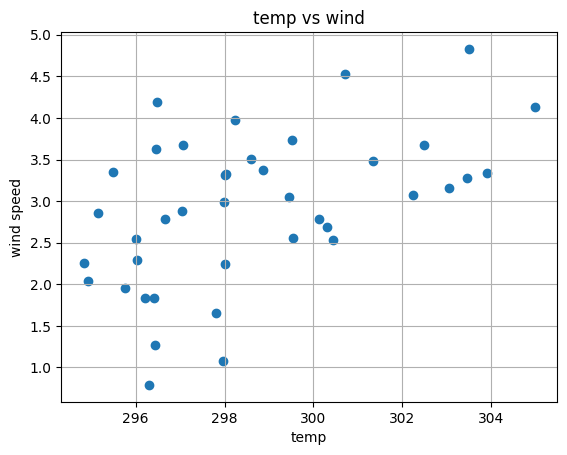

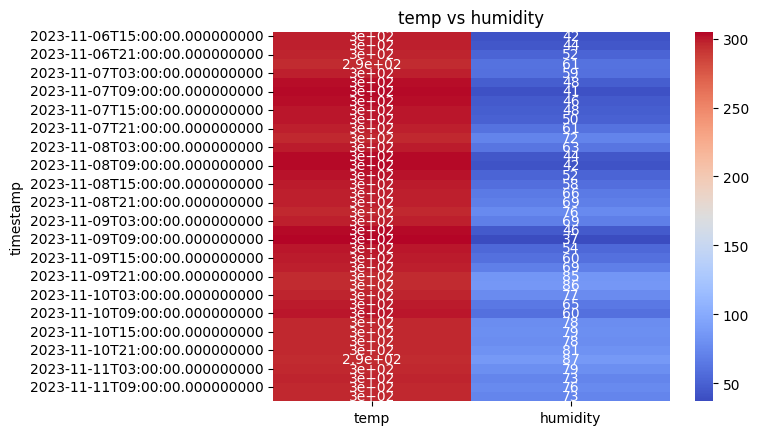

In [63]:
import requests
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

api_key = 'a954eb68a53c2cb94e368339f63a2e71'

# Set the location for which you want to retrieve weather data
lat = 18.184135
lon = 74.610764

# Construct the API URL
api_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={api_key}"

req = requests.get(api_url)
req

data = req.json()['list']
data

# Creating db from json
date=[]
arr=[]
weather=[]
wind=[]

for i in data:
    date.append(i["dt"])
    arr.append(i['main'])
    weather.append(i['weather'][0]['main'])
    wind.append(i['wind']['speed'])
    
db = pd.DataFrame(arr)
db['wind'] = wind
db['weather'] = weather
db['date'] = pd.to_datetime(date, unit='s')
db['timestamp'] = db['date']
db.set_index('timestamp', inplace=True)

db['temp'].mean()
db['temp'].max()
db['temp'].min()


plt.plot(db['date'], db['temp'])
plt.show()

# Average daily temperature.
daily_mean_temp = db['temp'].resample('D').mean()
plt.figure(figsize=(10,6))
daily_mean_temp.plot(color='red',marker="o",linestyle='-')
plt.title("mean daily temp")
plt.xlabel("Date")
plt.ylabel("temp (Celcius)")
plt.grid()
plt.show()

# 
plt.scatter(db['temp'], db['wind'])
plt.title("temp vs wind")
plt.xlabel("temp")
plt.ylabel('wind speed')
plt.grid()
plt.show()

heat_db = db[['temp','humidity']]
sns.heatmap(heat_db,cmap="coolwarm", annot=True)
plt.title("temp vs humidity")
plt.show()


In [39]:
import requests
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

In [3]:
api_key = 'a954eb68a53c2cb94e368339f63a2e71'

# Set the location for which you want to retrieve weather data
lat = 18.184135
lon = 74.610764

# Construct the API URL
api_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={api_key}"


In [4]:
req = requests.get(api_url)
req

<Response [200]>

In [14]:
data = req.json()['list']
data

[{'dt': 1699282800,
  'main': {'temp': 298.6,
   'feels_like': 298.3,
   'temp_min': 298.6,
   'temp_max': 298.6,
   'pressure': 1015,
   'sea_level': 1015,
   'grnd_level': 951,
   'humidity': 42,
   'temp_kf': 0},
  'weather': [{'id': 801,
    'main': 'Clouds',
    'description': 'few clouds',
    'icon': '02n'}],
  'clouds': {'all': 12},
  'wind': {'speed': 3.51, 'deg': 69, 'gust': 4.67},
  'visibility': 10000,
  'pop': 0,
  'sys': {'pod': 'n'},
  'dt_txt': '2023-11-06 15:00:00'},
 {'dt': 1699293600,
  'main': {'temp': 298.03,
   'feels_like': 297.72,
   'temp_min': 296.88,
   'temp_max': 298.03,
   'pressure': 1015,
   'sea_level': 1015,
   'grnd_level': 951,
   'humidity': 44,
   'temp_kf': 1.15},
  'weather': [{'id': 801,
    'main': 'Clouds',
    'description': 'few clouds',
    'icon': '02n'}],
  'clouds': {'all': 18},
  'wind': {'speed': 3.33, 'deg': 73, 'gust': 4.52},
  'visibility': 10000,
  'pop': 0,
  'sys': {'pod': 'n'},
  'dt_txt': '2023-11-06 18:00:00'},
 {'dt': 1699304

In [27]:
date=[]
arr=[]
weather=[]
wind=[]

for i in data:
    date.append(i["dt"])
    arr.append(i['main'])
    weather.append(i['weather'][0]['main'])
    wind.append(i['wind']['speed'])
    

In [47]:
db = pd.DataFrame(arr)
db['wind'] = wind
db['weather'] = weather
db['date'] = pd.to_datetime(date, unit='s')
db['timestamp'] = db['date']
db.set_index('timestamp', inplace=True)

In [48]:
db.head()

,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,temp_kf,wind,weather,date
timestamp,,,,,,,,,,,,
2023-11-06 15:00:00,298.60,298.30,298.60,298.60,1015,1015,951,42,0.00,3.51,Clouds,2023-11-06 15:00:00
2023-11-06 18:00:00,298.03,297.72,296.88,298.03,1015,1015,951,44,1.15,3.33,Clouds,2023-11-06 18:00:00
2023-11-06 21:00:00,296.67,296.44,295.71,296.67,1014,1014,949,52,0.96,2.79,Clouds,2023-11-06 21:00:00
2023-11-07 00:00:00,294.93,294.76,294.93,294.93,1014,1014,950,61,0.00,2.04,Clouds,2023-11-07 00:00:00
2023-11-07 03:00:00,297.99,298.07,297.99,297.99,1016,1016,953,59,0.00,2.99,Clouds,2023-11-07 03:00:00


In [49]:
db['temp'].mean()
db['temp'].max()
db['temp'].min()

294.83

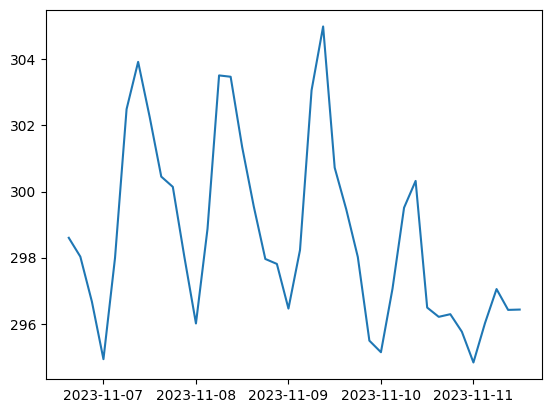

In [50]:
plt.plot(db['date'], db['temp'])

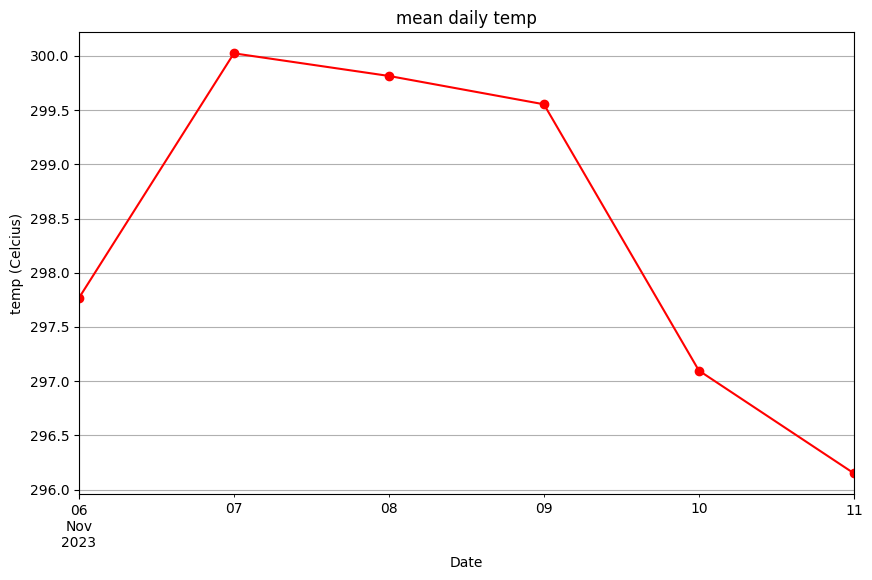

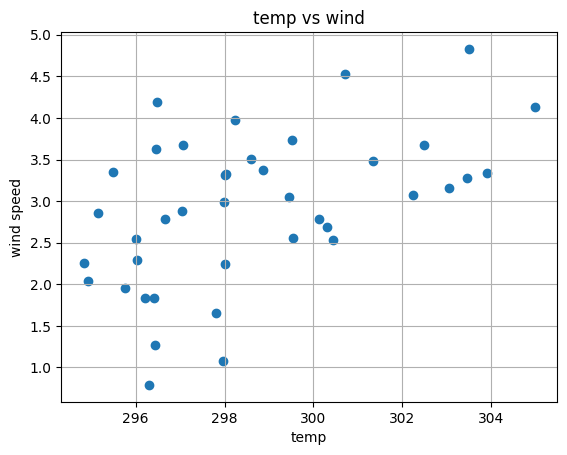

In [57]:
# Average daily temperature.
daily_mean_temp = db['temp'].resample('D').mean()
plt.figure(figsize=(10,6))
daily_mean_temp.plot(color='red',marker="o",linestyle='-')
plt.title("mean daily temp")
plt.xlabel("Date")
plt.ylabel("temp (Celcius)")
plt.grid()
plt.show()

# 
plt.scatter(db['temp'], db['wind'])
plt.title("temp vs wind")
plt.xlabel("temp")
plt.ylabel('wind speed')
plt.grid()
plt.show()

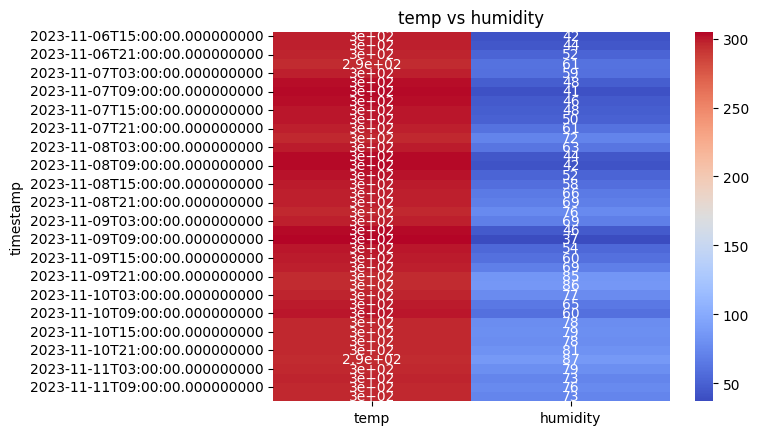

In [62]:
heat_db = db[['temp','humidity']]
sns.heatmap(heat_db,cmap="coolwarm", annot=True)
plt.title("temp vs humidity")
plt.show()